### HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

Analysis using PCA and Clustering to make appropriate choice to disburse funds to countries in need.

In [925]:
# Importing required libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# For Scaling our data
from sklearn.preprocessing import scale

# For KMeans clustering 
from sklearn.cluster import KMeans

# For Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [926]:
# Importing the dataset
country_data = pd.read_csv("country.csv",sep = ',',encoding = "ISO-8859-1", header= 0)


In [798]:
country_data.head() # First look at the dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Understanding and Introspecting our dataframe

In [799]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [800]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Exploratory Data Analysis on the DataSet to prepare it for further processes

In [801]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [802]:
country_data.shape

(167, 10)

### Checking for the null values in the dataset


In [803]:
# Checking the percentage of null values country_data
round(100*(country_data.isnull().sum()/len(country_data.index)), 2)

# No null values

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

### Scaling/ Standardisation of Data + Dropping non-PCA related columns

In [804]:
# Normalising continuous features
country_data_new = country_data.drop("country", axis=1)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_data_new = standard_scaler.fit_transform(country_data_new)

In [805]:
country_data_new

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [806]:
cols=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

In [807]:
country_data_new=pd.DataFrame(country_data_new, columns=cols)

In [808]:
country_data_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [809]:
country_data_new.shape

(167, 9)

### PCA on the standardised data

In [810]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=50)

In [811]:
#Performing a Fit Transform
pca.fit(country_data_new)



PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
  svd_solver='randomized', tol=0.0, whiten=False)

In [812]:
pca.components_ # PCA Components

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [813]:
country_pca = pca.transform(country_data_new)
country_pca.shape

(167, 9)

### Find PC for the entire dataset.



In [814]:
#Evaluating PCA for the complete dataset
country_pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'Feature':country_data_new.columns })
country_pca_df

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,0.370653,child_mort
1,0.283897,0.613163,0.144761,0.003091,exports
2,0.150838,-0.243087,-0.596632,0.461897,health
3,0.161482,0.671821,-0.299927,-0.071907,imports
4,0.398441,0.022536,0.301548,0.392159,income
5,-0.193173,-0.008404,0.642520,0.150442,inflation
6,0.425839,-0.222707,0.113919,-0.203797,life_expec
7,-0.403729,0.155233,0.019549,0.378304,total_fer
8,0.392645,-0.046022,0.122977,0.531995,gdpp


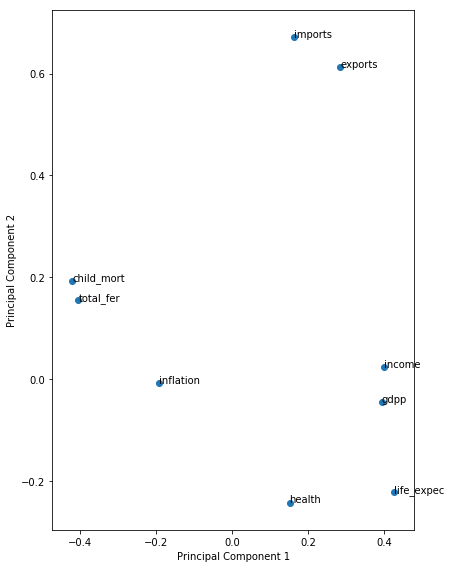

In [928]:
%matplotlib inline
fig = plt.figure(figsize = (6,8))
plt.scatter(country_pca_df.PC1, country_pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(country_pca_df.Feature):
    plt.annotate(txt, (country_pca_df.PC1[i],country_pca_df.PC2[i]))
plt.tight_layout()
plt.show()

We can see that the first component is in the direction of life_expec, income, gdpp; Also these three components have the highest loadings.

In [816]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

### Using scree to identify optimal number of PCs

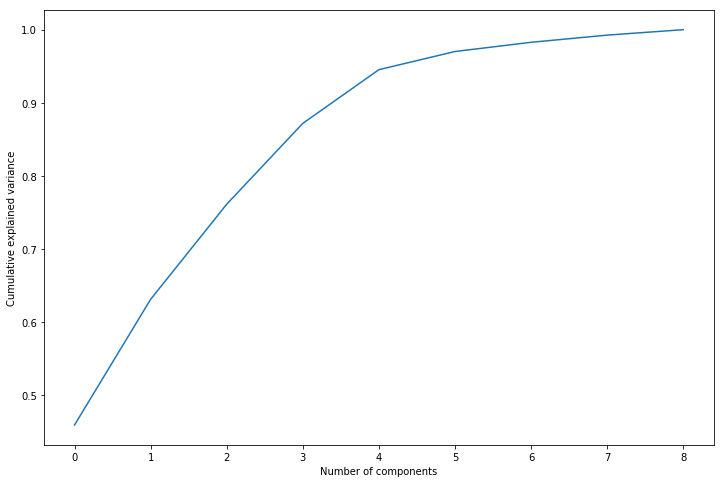

In [817]:
#Screeplot - cumulative variance is plotted against number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [818]:
#Correlation matrix for the principal components
corrmat = np.corrcoef(country_pca.transpose())

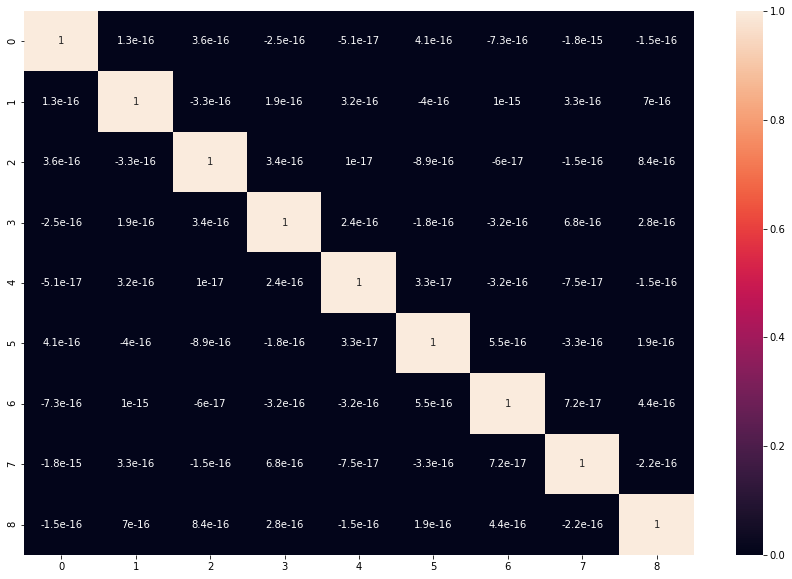

In [929]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,10))
sns.heatmap(corrmat,annot = True)

In [820]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.0104132134113454e-15 , min corr:  -1.800106048681157e-15


#### Choosing 4 components as they are optimal to describe 90% of the variance in the dataset

In [821]:
pca_f = PCA(n_components=4,svd_solver='randomized', random_state=42)
pca_final = pca_f.fit_transform(country_data_new)
pca_final



array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01],
       [ 1.26874386e+00, -6.56588363e-01, -4.88097616e-01,
         5.56335553e-02],
       [ 1.67099640e+00,  5.61162493e-01,  9.91258303e-01,
      

In [822]:
#Correlation Matrix for the PCA components
corrmat_final = np.corrcoef(pca_final.transpose())

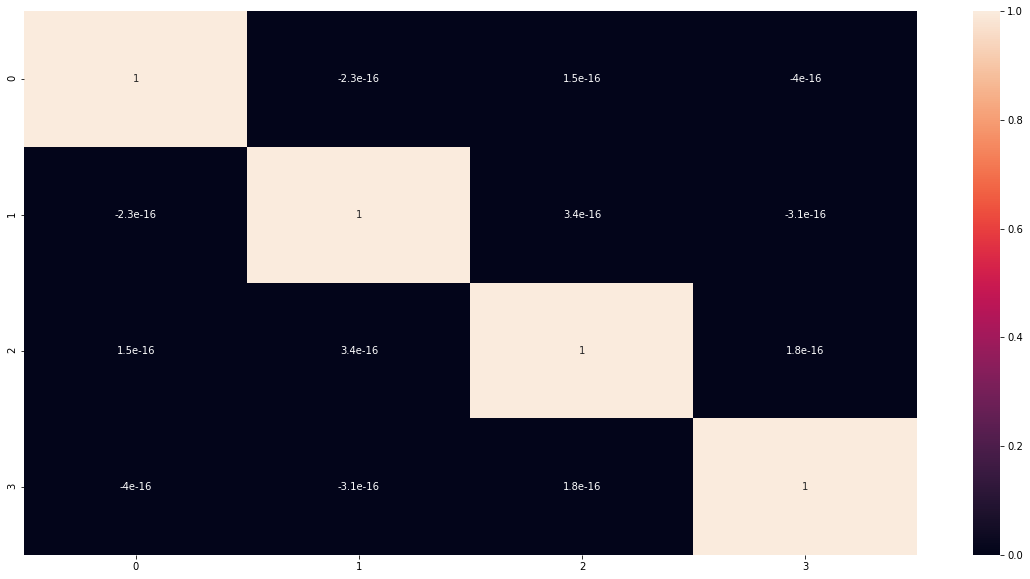

In [823]:
#plotting the correlation matrix in a heatmap
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat_final,annot = True)

#### Checking whether using incremental PCA will be beneficial here or not


In [824]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_incremental = IncrementalPCA(n_components=4)

#### Basis transformation - getting the data onto our PCs


In [825]:
pca_inc = pca_incremental.fit_transform(country_data_new)
pca_inc.shape

(167, 4)

#### Creating correlation matrix for the incremental principal components - we expect little to no correlation

In [826]:
#Correlation matrix for the principal components
corrmat_inc = np.corrcoef(pca_inc.transpose())

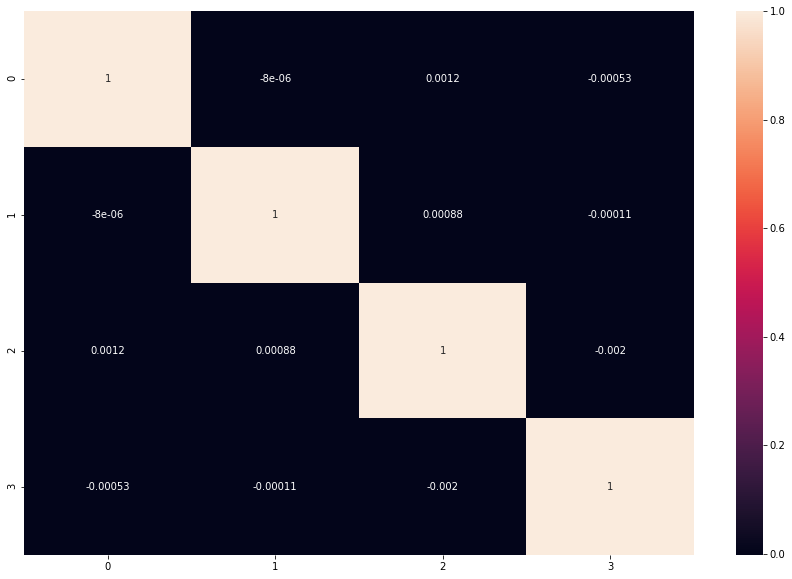

In [827]:
#plotting the correlation matrix on a heatmap
%matplotlib inline
plt.figure(figsize = (15,10))
sns.heatmap(corrmat_inc,annot = True)

In [828]:
# 1s -> 0s in diagonals
corrmat_nodiag_inc = corrmat_inc - np.diagflat(corrmat_inc.diagonal())
print("max corr:",corrmat_nodiag_inc.max(), ", min corr: ", corrmat_nodiag_inc.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092543874 , min corr:  -0.0020378295355520564


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [829]:
#Improting the PCA module
pca_again = PCA(n_components=4,svd_solver='randomized', random_state=42)
#Doing the PCA on the NORM data
pca_final=pca_again.fit_transform(country_data_new)

pca_data = pd.DataFrame({'PC1':pca_final[:,0], 'PC2':pca_final[:,1],\
                       'PC3':pca_final[:,2],'PC4':pca_final[:,3]})

In [830]:
pca_data.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


### Preparing Data for K-Means

In [831]:
#Setting country variable as the index
country_data.set_index('country')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900


In [832]:
pca_data.shape

(167, 4)

In [833]:
#Removing the outliers

pca_data=pca_data[pca_data.PC1<=pca_data.PC1.quantile(0.95)]

In [834]:
pca_data=pca_data[pca_data.PC2<=pca_data.PC2.quantile(0.95)]

In [835]:
pca_data=pca_data[pca_data.PC3<=pca_data.PC3.quantile(0.95)]

In [836]:
pca_data=pca_data[pca_data.PC4<=pca_data.PC4.quantile(0.95)]

In [837]:
pca_data.reset_index()

,index,PC1,PC2,PC3,PC4
0,0,-2.913025,0.095621,-0.718118,1.005255
1,1,0.429911,-0.588156,-0.333486,-1.161059
2,2,-0.285225,-0.455174,1.221505,-0.868115
3,4,1.033576,0.136659,-0.225721,-0.847063
4,5,0.022407,-1.779187,0.869997,-0.036967
5,6,-0.101584,-0.568252,0.242092,-1.466266
6,7,2.342165,-1.988459,0.190344,1.105038
7,8,2.973764,-0.734689,-0.519766,1.205442
8,9,-0.181487,-0.402866,0.867459,-0.438773
9,10,1.268744,-0.656588,-0.488098,0.055634


In [838]:
pca_data.shape

(134, 4)

### K Means Clustering

### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [839]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [840]:
hopkins(pca_data)

0.7624393184832203

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [841]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_data)
    sse_.append([k, silhouette_score(pca_data, kmeans.labels_)])

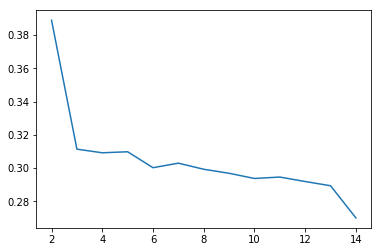

In [842]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### sum of squared distances



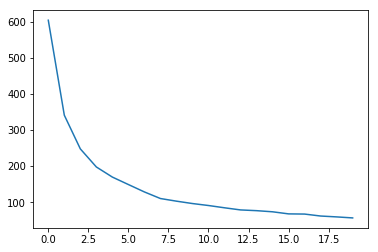

In [843]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [844]:
pca_data.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
4,1.033576,0.136659,-0.225721,-0.847063
5,0.022407,-1.779187,0.869997,-0.036967


In [845]:
pca_data.reset_index()

,index,PC1,PC2,PC3,PC4
0,0,-2.913025,0.095621,-0.718118,1.005255
1,1,0.429911,-0.588156,-0.333486,-1.161059
2,2,-0.285225,-0.455174,1.221505,-0.868115
3,4,1.033576,0.136659,-0.225721,-0.847063
4,5,0.022407,-1.779187,0.869997,-0.036967
5,6,-0.101584,-0.568252,0.242092,-1.466266
6,7,2.342165,-1.988459,0.190344,1.105038
7,8,2.973764,-0.734689,-0.519766,1.205442
8,9,-0.181487,-0.402866,0.867459,-0.438773
9,10,1.268744,-0.656588,-0.488098,0.055634


In [846]:
# Taking the number of clusters as 5 -- First iteration
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_data)
y_kmeans = kmeans.predict(pca_data)


In [847]:
pca_data.reset_index()

,index,PC1,PC2,PC3,PC4
0,0,-2.913025,0.095621,-0.718118,1.005255
1,1,0.429911,-0.588156,-0.333486,-1.161059
2,2,-0.285225,-0.455174,1.221505,-0.868115
3,4,1.033576,0.136659,-0.225721,-0.847063
4,5,0.022407,-1.779187,0.869997,-0.036967
5,6,-0.101584,-0.568252,0.242092,-1.466266
6,7,2.342165,-1.988459,0.190344,1.105038
7,8,2.973764,-0.734689,-0.519766,1.205442
8,9,-0.181487,-0.402866,0.867459,-0.438773
9,10,1.268744,-0.656588,-0.488098,0.055634


In [848]:
df = pd.DataFrame(pd.Series(kmeans.labels_))

In [849]:
pca_data.index = pd.RangeIndex(len(pca_data.index))

In [850]:
print(pca_data.index)

RangeIndex(start=0, stop=134, step=1)


In [851]:
country_data_km = pd.concat((pca_data, df), axis=1)

In [852]:
country_data_km=country_data_km.rename(columns = {0:'ClusterID'})

In [856]:
country_data_km.ClusterID.unique() # 5 Clusters are created

array([3, 2, 4, 1, 0])

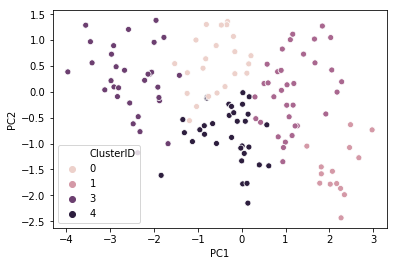

In [854]:
sns.scatterplot(country_data_km['PC1'], country_data_km['PC2'], hue=country_data_km['ClusterID'])
# We can see from below data that four clusters are enough to represent our data

In [858]:
# Re-iterating with four clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_data)
y_kmeans = kmeans.predict(pca_data)


In [859]:
pca_data.reset_index()

,index,PC1,PC2,PC3,PC4
0,0,-2.913025,0.095621,-0.718118,1.005255
1,1,0.429911,-0.588156,-0.333486,-1.161059
2,2,-0.285225,-0.455174,1.221505,-0.868115
3,3,1.033576,0.136659,-0.225721,-0.847063
4,4,0.022407,-1.779187,0.869997,-0.036967
5,5,-0.101584,-0.568252,0.242092,-1.466266
6,6,2.342165,-1.988459,0.190344,1.105038
7,7,2.973764,-0.734689,-0.519766,1.205442
8,8,-0.181487,-0.402866,0.867459,-0.438773
9,9,1.268744,-0.656588,-0.488098,0.055634


In [860]:
pd.Series(kmeans.labels_)

0      1
1      0
2      2
3      0
4      2
5      2
6      3
7      3
8      2
9      3
10     0
11     2
12     0
13     0
14     0
15     1
16     0
17     2
18     0
19     1
20     2
21     0
22     1
23     0
24     1
25     0
26     1
27     1
28     2
29     2
      ..
104    1
105    0
106    1
107    0
108    0
109    3
110    0
111    1
112    3
113    3
114    2
115    0
116    1
117    0
118    2
119    1
120    0
121    1
122    1
123    2
124    0
125    2
126    0
127    0
128    3
129    2
130    2
131    0
132    1
133    1
Length: 134, dtype: int32

In [861]:
df = pd.DataFrame(pd.Series(kmeans.labels_))

In [862]:
pca_data.index = pd.RangeIndex(len(pca_data.index))
print(pca_data.index)

RangeIndex(start=0, stop=134, step=1)


In [863]:
print(pca_data.index)

RangeIndex(start=0, stop=134, step=1)


In [864]:
country_data_km = pd.concat((pca_data, df), axis=1)

In [865]:
country_data_km=country_data_km.rename(columns = {0:'ClusterID'})

In [866]:
country_data_km.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'ClusterID'], dtype='object')

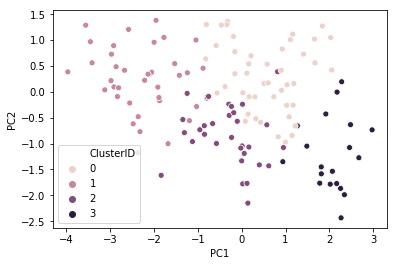

In [867]:
sns.scatterplot(country_data_km['PC1'], country_data_km['PC2'], hue=country_data_km['ClusterID'])

In [868]:
 NGOData =pd.merge(country_data, country_data_km, left_index=True, right_index=True)

In [870]:
NGOData.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1.033576,0.136659,-0.225721,-0.847063,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.022407,-1.779187,0.869997,-0.036967,2


In [874]:
NGOData.groupby('ClusterID').gdpp.mean()

ClusterID
0    10515.622222
1    13581.675676
2    15651.787879
3    12250.368421
Name: gdpp, dtype: float64

In [875]:
NGOData.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'PC1', 'PC2', 'PC3',
       'PC4', 'ClusterID'],
      dtype='object')

In [876]:
NGOData.groupby(['ClusterID']).size() # By Number

ClusterID
0    45
1    37
2    33
3    19
dtype: int64

Text(0.5,1,'Count of countries by type')

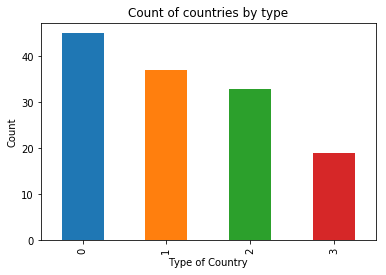

In [877]:
NGOData.ClusterID.value_counts().plot.bar()
plt.xlabel("Type of Country")
plt.ylabel("Count")
plt.title("Count of countries by type")

# We see that Cluster 0 has maximum number of countries

In [878]:
NGOData['ClusterID'] = NGOData.ClusterID.astype(str).str.lower()

In [879]:
# Cluster wise dividing the master database
df_0 = NGOData[NGOData.ClusterID == '0'] 
df_1 = NGOData[NGOData.ClusterID == '1']
df_2=NGOData[NGOData.ClusterID == '2']
df_3=NGOData[NGOData.ClusterID == '3']

In [880]:
df_0.head() 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1.033576,0.136659,-0.225721,-0.847063,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1.670996,0.561162,0.991258,-0.207080,0
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,1.081374,-0.481970,-0.664355,-0.522505,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,0.580025,0.535327,0.486228,-1.035275,0


In [881]:
df_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400,-2.672314,0.418172,-0.257368,0.278672,1
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1980,-0.882088,0.457368,-0.584633,0.406161,1
22,Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.80,11200,-3.122053,0.038775,-0.455751,1.080918,1
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.11,73.9,1.57,6840,-2.807909,0.078649,-0.342961,0.543557,1


In [882]:
df_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0.022407,-1.779187,0.869997,-0.036967,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,-0.101584,-0.568252,0.242092,-1.466266,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,-0.181487,-0.402866,0.867459,-0.438773,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,-1.123851,-0.961397,0.526615,-1.197201,2


In [931]:
df_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2.342165,-1.988459,0.190344,1.105038,3
7,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900,2.973764,-0.734689,-0.519766,1.205442,3
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,1.268744,-0.656588,-0.488098,0.055634,3
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0.937827,-1.350472,-0.821130,-0.259855,3
35,Colombia,18.6,15.9,7.59,17.8,10900,3.86,76.4,2.01,6250,2.174455,-0.004510,0.257320,-0.311857,3


In [884]:
# Calculating the mean of each variable by ClusterID and creating a new dataframe called NGOData_mean 
NGOData_mean=pd.DataFrame()
NGOData_mean['gdpp']=NGOData.groupby('ClusterID').gdpp.mean()
NGOData_mean['child_mort']=NGOData.groupby('ClusterID').child_mort.mean()
NGOData_mean['exports']=NGOData.groupby('ClusterID').exports.mean()
NGOData_mean['health']=NGOData.groupby('ClusterID').health.mean()
NGOData_mean['imports']=NGOData.groupby('ClusterID').imports.mean()
NGOData_mean['income']=NGOData.groupby('ClusterID').income.mean()
NGOData_mean['inflation']=NGOData.groupby('ClusterID').inflation.mean()
NGOData_mean['life_expec']=NGOData.groupby('ClusterID').life_expec.mean()
NGOData_mean['total_fer']=NGOData.groupby('ClusterID').total_fer.mean()

NGOData_mean['ClusterID']=NGOData_mean.index



In [886]:
NGOData_mean.head()

,gdpp,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,ClusterID
ClusterID,,,,,,,,,,
0,10515.622222,36.313333,43.180200,6.453556,51.348131,15283.777778,4.657733,70.777778,2.810667,0
1,13581.675676,39.454054,42.562432,6.646216,43.875676,18668.918919,7.540730,70.372973,3.024324,1
2,15651.787879,31.563636,43.290909,7.139697,50.581818,19967.848485,8.042030,72.260606,2.738788,2
3,12250.368421,65.147368,33.667368,6.786316,41.726316,15315.473684,12.894632,66.473684,3.558421,3


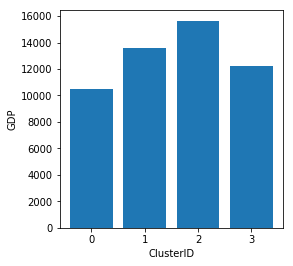

In [888]:
fig = plt.figure(figsize = (4,4))
plt.xlabel('ClusterID')
plt.ylabel('GDP')
plt.bar(NGOData_mean['ClusterID'], NGOData_mean['gdpp'])
plt.show()

# When alloting money for creating job, skilling people and employment so that the GDP of the companies increases--
# countries in Cluster 0 and 3 should be focussed.

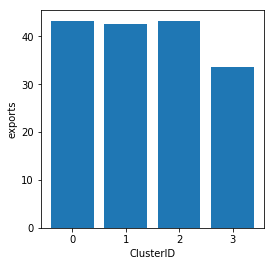

In [889]:
fig = plt.figure(figsize = (4,4))
plt.xlabel('ClusterID')
plt.ylabel('exports')
plt.bar(NGOData_mean['ClusterID'], NGOData_mean['exports'])
plt.show()

# The exports of countries in Cluster 1, Cluster 2 and Cluster 0 are comparable; Funds should given to 
#help countries in Cluster 3 to increase there exports;

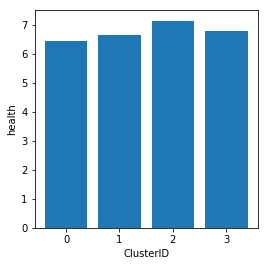

In [890]:
fig = plt.figure(figsize = (4,4))
plt.xlabel('ClusterID')
plt.ylabel('health')
plt.bar(NGOData_mean['ClusterID'], NGOData_mean['health'])
plt.show()

# Spendings on health is comaprable for all the three clusters; Other factors such as life expectancy and child mortality 
# will be a more defining factor for funds disbursal

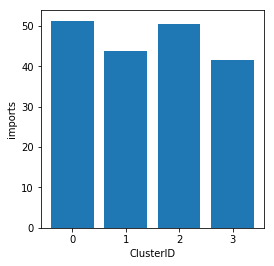

In [892]:
fig = plt.figure(figsize = (4,4))
plt.xlabel('ClusterID')
plt.ylabel('imports')
plt.bar(NGOData_mean['ClusterID'], NGOData_mean['imports'])
plt.show()

# Imports of a country should not be high as it devalues its currency and also increases debt;

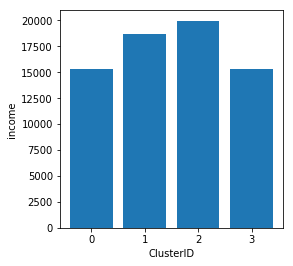

In [893]:
fig = plt.figure(figsize = (4,4))
plt.xlabel('ClusterID')
plt.ylabel('income')
plt.bar(NGOData_mean['ClusterID'], NGOData_mean['income'])
plt.show()

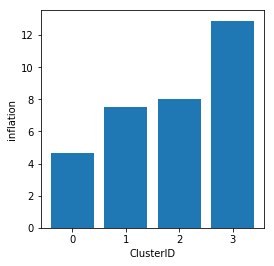

In [894]:
fig = plt.figure(figsize = (4,4))
plt.xlabel('ClusterID')
plt.ylabel('inflation')
plt.bar(NGOData_mean['ClusterID'], NGOData_mean['inflation'])
plt.show()

# Countries in Cluster 3 show high inflation; Measures to curb the same should be taken by appropriate fund disbursal.

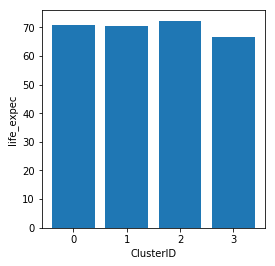

In [895]:
fig = plt.figure(figsize = (4,4))
plt.xlabel('ClusterID')
plt.ylabel('life_expec')
plt.bar(NGOData_mean['ClusterID'], NGOData_mean['life_expec'])
plt.show()

# Life expectancy is comparable in almost all the clusters; Though this is a mean data which requires further scrutinization 
# to understand medical facilities in countries which enhances life expectancy

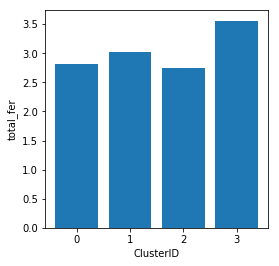

In [896]:
fig = plt.figure(figsize = (4,4))
plt.xlabel('ClusterID')
plt.ylabel('total_fer')
plt.bar(NGOData_mean['ClusterID'], NGOData_mean['total_fer'])
plt.show()

# Cluster 3 shows high total fertility which is not good for the health of both mother and her children; Higher TFR means
# greater population which is a burden on our limited resources; Funds should be spent on educating couples as well as
# providing them with birth control measures. Focus should be on countries in Cluster 3.

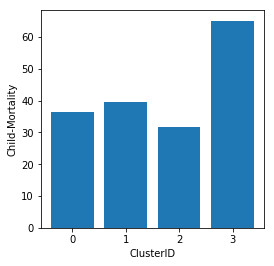

In [897]:
fig = plt.figure(figsize = (4,4))
plt.xlabel('ClusterID')
plt.ylabel('Child-Mortality')
plt.bar(NGOData_mean['ClusterID'], NGOData_mean['child_mort'])
plt.show()

# Child mortality seems to be on the higher side in Cluster 3. Hence funds should be disbursed for countries in cluster 3
# for children health, nutrition,maternity care, vaccination and education.

## Hierarchial Clustering


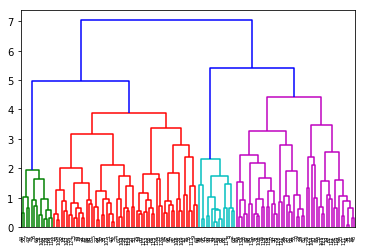

In [898]:
# Performing Hierarchial Clustering on the PCA Data
mergings = linkage(pca_data, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [901]:
# From the above dendogram we choose no of clusters as 4; Taking a clue from K-means to choose number of clusters as 4
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

In [902]:
country_data_hcm = pd.concat([country_data,clusterCut], axis=1)

In [903]:
country_data_hcm.columns = ['country', 'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']

In [906]:
df_hc_0 = country_data_hcm[country_data_hcm.ClusterID == 0] 
df_hc_1 = country_data_hcm[country_data_hcm.ClusterID == 1]
df_hc_2=country_data_hcm[country_data_hcm.ClusterID == 2]
df_hc_3=country_data_hcm[country_data_hcm.ClusterID == 3]

In [907]:
df_hc_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400,0.0
16,Belize,18.8,58.2,5.20,57.5,7880,1.14,71.4,2.71,4340,0.0
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1980,0.0
22,Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.80,11200,0.0


In [908]:
df_hc_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1.0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,1.0


In [909]:
df_hc_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2.0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2.0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2.0
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,2.0
39,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200,2.0


In [910]:
df_hc_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,3.0
7,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900,3.0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.22,79.5,1.87,58000,3.0
45,Dominican Republic,34.4,22.7,6.22,33.3,11100,5.44,74.6,2.60,5450,3.0
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.90,60.9,5.21,17100,3.0


In [916]:
# Calculating the mean of each variable by ClusterID and creating a new dataframe called NGOData_mean 
NGOData_hc_mean=pd.DataFrame()
NGOData_hc_mean['gdpp']=country_data_hcm.groupby('ClusterID').gdpp.mean()
NGOData_hc_mean['child_mort']=country_data_hcm.groupby('ClusterID').child_mort.mean()
NGOData_hc_mean['exports']=country_data_hcm.groupby('ClusterID').exports.mean()
NGOData_hc_mean['health']=country_data_hcm.groupby('ClusterID').health.mean()
NGOData_hc_mean['imports']=country_data_hcm.groupby('ClusterID').imports.mean()
NGOData_hc_mean['income']=country_data_hcm.groupby('ClusterID').income.mean()
NGOData_hc_mean['inflation']=country_data_hcm.groupby('ClusterID').inflation.mean()
NGOData_hc_mean['life_expec']=country_data_hcm.groupby('ClusterID').life_expec.mean()
NGOData_hc_mean['total_fer']=country_data_hcm.groupby('ClusterID').total_fer.mean()
NGOData_hc_mean['ClusterID']=NGOData_hc_mean.index

In [917]:
NGOData_hc_mean.head()

,gdpp,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,ClusterID
ClusterID,,,,,,,,,,
0.0,15719.666667,35.020833,45.410625,6.502292,45.493750,22300.416667,6.668521,71.412500,2.865625,0.0
1.0,8062.362069,44.148276,38.996362,6.595345,50.621826,11470.051724,6.790534,69.155172,3.111207,1.0
2.0,18976.533333,25.380000,44.940000,7.375333,46.280000,22306.666667,6.523467,74.780000,2.448000,2.0
3.0,16783.230769,57.769231,36.200000,7.353846,44.776923,19859.230769,14.399846,67.376923,3.203846,3.0


Visualizing the Hierarchiacal Clustering data

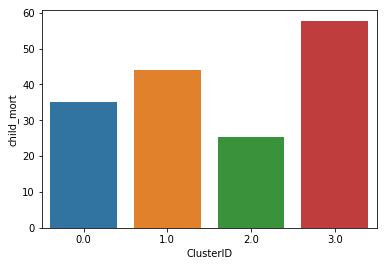

In [919]:
sns.barplot(x=NGOData_hc_mean.ClusterID, y=NGOData_hc_mean.child_mort)

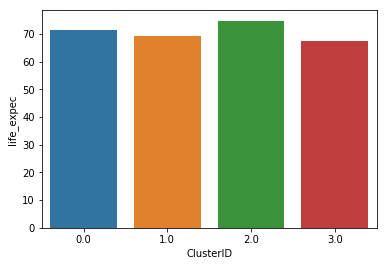

In [920]:
sns.barplot(x=NGOData_hc_mean.ClusterID, y=NGOData_hc_mean.life_expec)

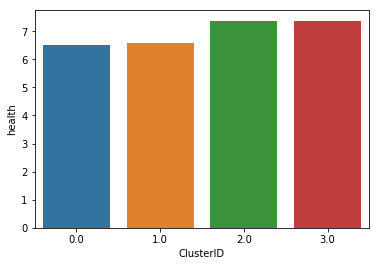

In [921]:
sns.barplot(x=NGOData_hc_mean.ClusterID, y=NGOData_hc_mean.health)

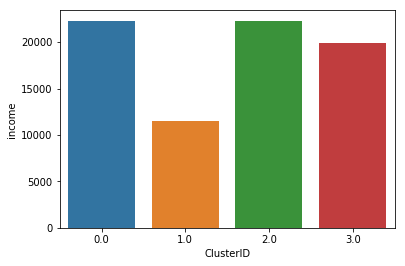

In [922]:
sns.barplot(x=NGOData_hc_mean.ClusterID, y=NGOData_hc_mean.income)

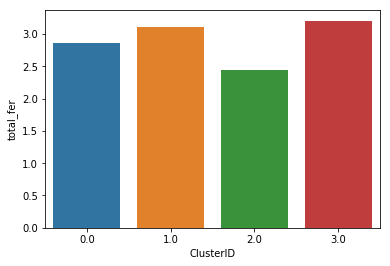

In [923]:
sns.barplot(x=NGOData_hc_mean.ClusterID, y=NGOData_hc_mean.total_fer)

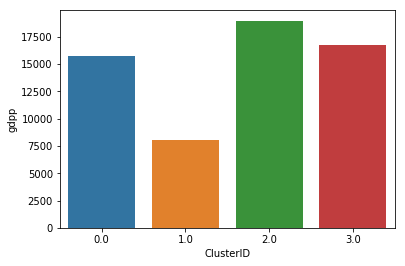

In [924]:
sns.barplot(x=NGOData_hc_mean.ClusterID, y=NGOData_hc_mean.gdpp)

## Summary


K-means Clustering or Hierarchical clustering- With K=4 we get same result for both the methods; 
Recommendations- 
Income and GDP of countries in Cluster in 0 and 3 is comparatively less;
Therefore, when allocating money for creating job, skilling people and employment , countries in Cluster 0 and 3 should be focussed.
  b.    Inflation is also high in countries in Cluster 3 which is an indicator of bad economy
  c.    Child mortality and total fertility rate is also on the higher side in the Cluster 3
  d.    Therefore, countries in the Cluster 3 are in dire need of aids

Cluster 3-  Armenia, Azerbaijan, Chad, Equatorial Guinea, Haiti, Niger, Nigeria, Nepal etc. are a few countries that belong to least developed countries in the world.

Funding should be provided for education, health, nutrition and disease control. Skilling and employment should also be brought into focus.


In [934]:
#List of countries
df_3.shape

(19, 15)

In [935]:
df_3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,2.342165,-1.988459,0.190344,1.105038,3
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,2.973764,-0.734689,-0.519766,1.205442,3
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,1.268744,-0.656588,-0.488098,0.055634,3
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0.937827,-1.350472,-0.821130,-0.259855,3
35,Colombia,18.6,15.90,7.59,17.8,10900,3.860,76.4,2.01,6250,2.174455,-0.004510,0.257320,-0.311857,3
44,Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000,2.458960,-1.076143,-0.100439,0.899328,3
45,Dominican Republic,34.4,22.70,6.22,33.3,11100,5.440,74.6,2.60,5450,2.254271,-1.866638,-0.711988,1.230005,3
49,Equatorial Guinea,111.0,85.80,4.48,58.9,33700,24.900,60.9,5.21,17100,2.671422,-1.273610,-0.656171,1.125993,3
51,Estonia,4.5,75.10,6.03,68.7,22700,1.740,76.0,1.72,14600,1.779493,-1.765397,-0.684198,0.262702,3
58,Germany,4.2,42.30,11.60,37.1,40400,0.758,80.1,1.39,41800,2.480924,-0.634702,0.103795,0.919853,3
